<a href="https://colab.research.google.com/github/nihar6697/Task7/blob/main/Task7_5_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

**Importing the dataset**

In [3]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.shape

(400, 5)

In [6]:
df['Gender']= df.Gender.map({'Male': 0,'Female': 1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [7]:
df.drop(columns="User ID").head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [8]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [9]:
df = df.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [10]:
X = df[['Gender','Age','EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0) # train- test split

**Feature Scaling**

In [11]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

DecisionTreeClassifier()

**Predicting the Test set results**

In [13]:
# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [14]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_pred)

array([[53,  5],
       [ 2, 20]])

Test set accuracy: 0.91
Test set auc: 0.91


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


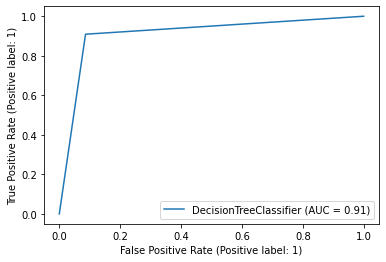

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test_scaled) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test_scaled, y_test)


#acc = roc_auc_score(y_train, dt.predict(X_train))
#print("Train set AUC : ", acc)

**Visualising the Training set results**

In [16]:
feature_names=np.array(X_train_scaled)
target_names=np.array(y)
feature_names_test=np.array(X_test_scaled)

In [17]:
from sklearn import tree

In [18]:
feature_names=feature_names.astype('str')
target_names=target_names.astype('str')
feature_names_test=feature_names_test.astype('str')

In [19]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

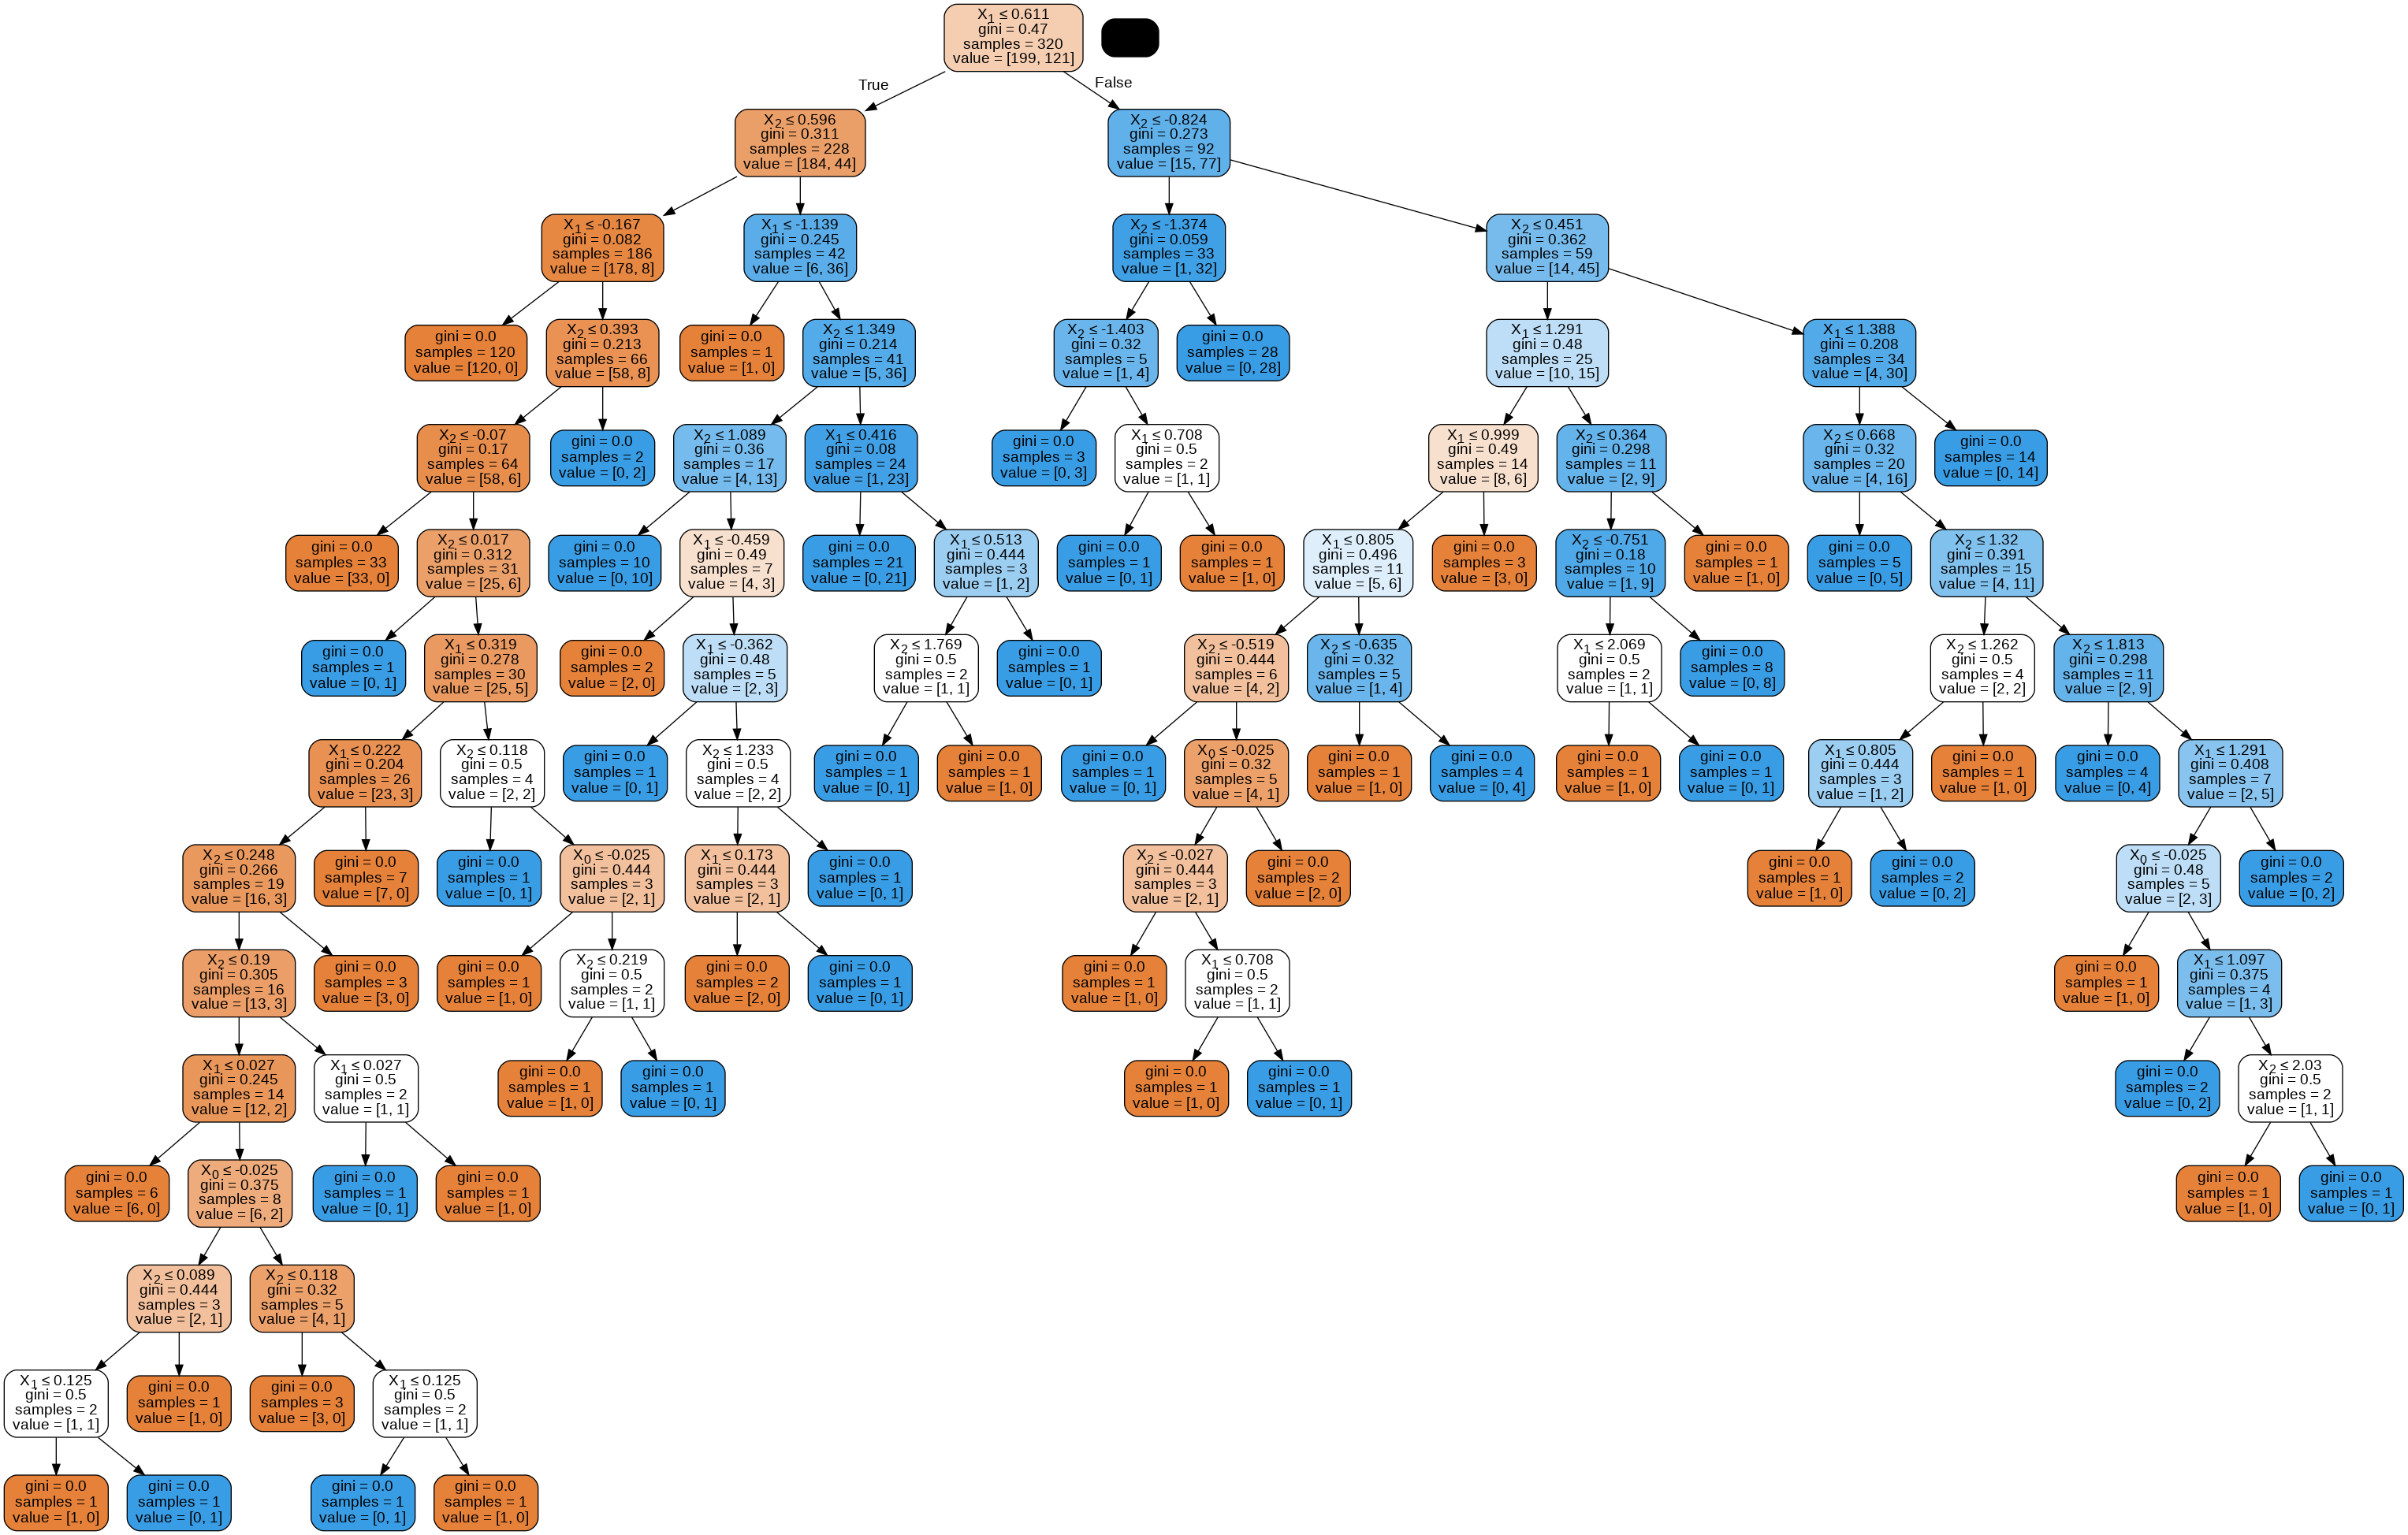

In [20]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Visualising the Test set results**

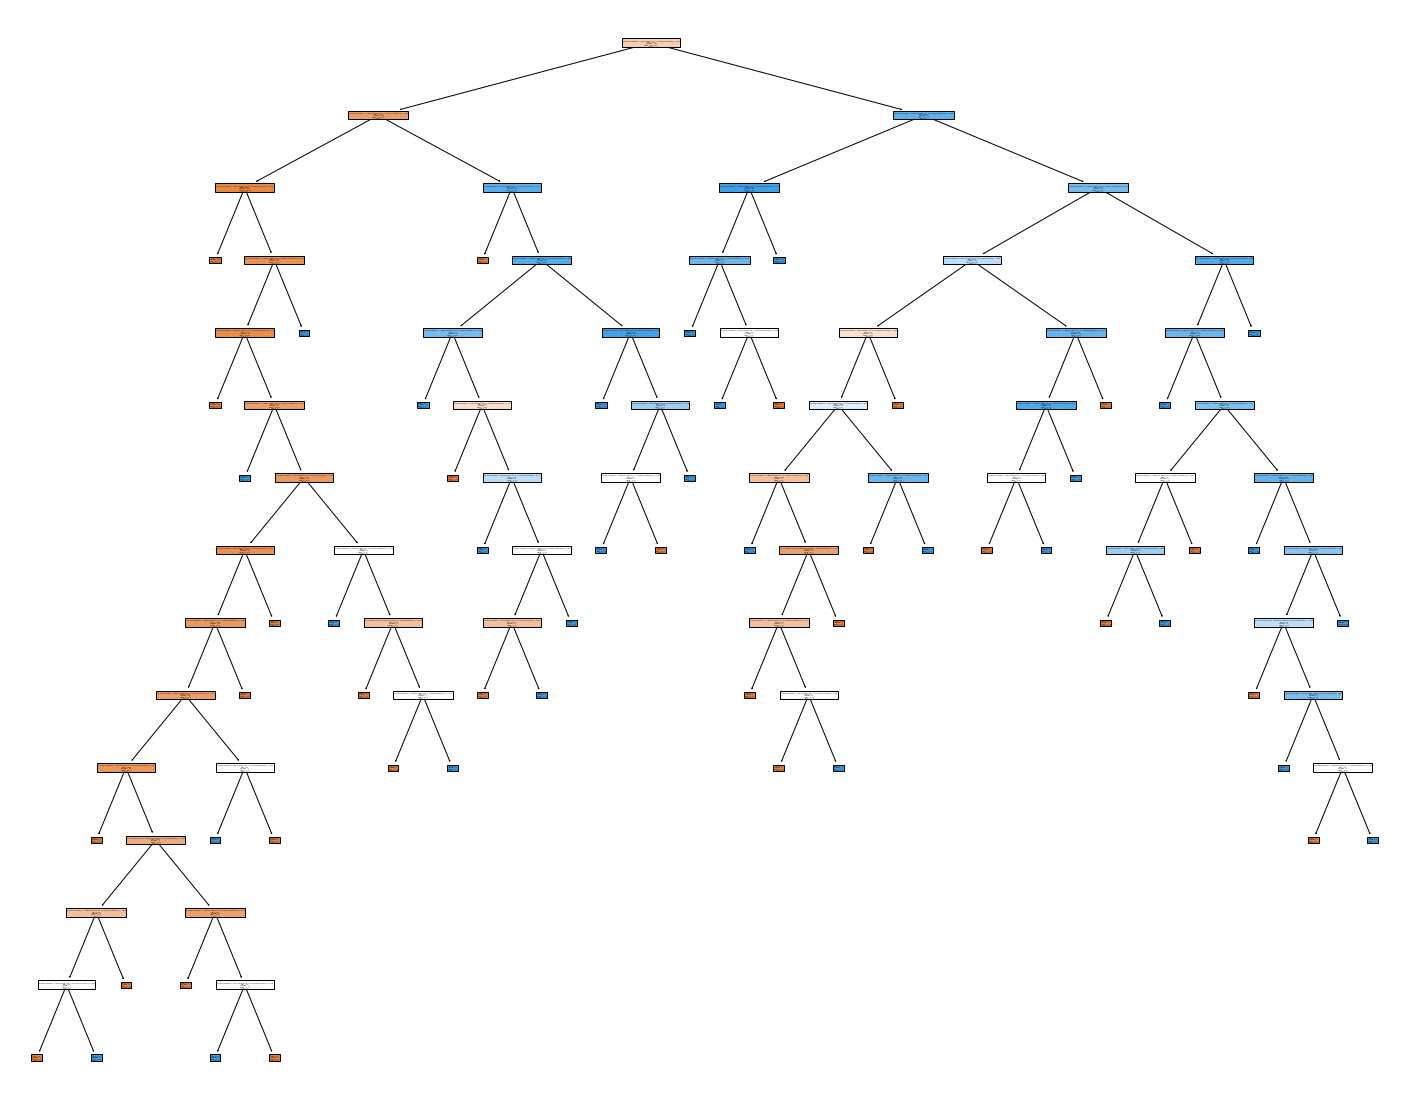

In [21]:

from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

[Text(0.46059782608695654, 0.9666666666666667, 'X[1] <= 0.611\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25, 0.9, 'X[2] <= 0.596\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.15217391304347827, 0.8333333333333334, 'X[1] <= -0.167\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.13043478260869565, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.17391304347826086, 0.7666666666666667, 'X[2] <= 0.393\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.15217391304347827, 0.7, 'X[2] <= -0.07\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.13043478260869565, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.17391304347826086, 0.6333333333333333, 'X[2] <= 0.017\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.15217391304347827, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1956521739130435, 0.5666666666666667, 'X[1] <= 0.319\ngini = 0.278\nsamples = 30\nvalue = 

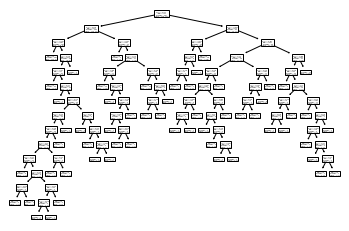

In [ ]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt